In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from utility import get_spotify_data, get_spotify_client
import spotipy as sp
import plotly.express as px

- Get all artists 
- Remove duplicates
- Call Spotify api to get related artists
- Remove the ones that aren't in my artists
- Connect each related artists to the base artist
- Show a graph/web graph

In [2]:
streaming_history = get_spotify_data('StreamingHistory')
streaming_history[:3]

[{'endTime': '2020-12-22 22:45',
  'artistName': 'meganeko',
  'trackName': 'Stasis',
  'msPlayed': 226000},
 {'endTime': '2020-12-22 22:59',
  'artistName': 'meganeko',
  'trackName': 'Robot Language',
  'msPlayed': 190008},
 {'endTime': '2020-12-22 23:05',
  'artistName': 'meganeko',
  'trackName': 'Robot Language',
  'msPlayed': 8435}]

In [3]:
df = pd.DataFrame.from_records(streaming_history)
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-12-22 22:45,meganeko,Stasis,226000
1,2020-12-22 22:59,meganeko,Robot Language,190008
2,2020-12-22 23:05,meganeko,Robot Language,8435
3,2020-12-22 23:06,meganeko,she speaks,57000
4,2020-12-22 23:10,meganeko,Super Gamer Girl 3D,289500


In [4]:
df.sort_values('endTime').head()

,endTime,artistName,trackName,msPlayed
67426,2019-12-16 00:21,Panic! At The Disco,Crazy = Genius,4940
67427,2020-03-07 18:13,Johann Sebastian Bach,"Bach, J.S.: Brandenburg Concerto No. 5 in D Ma...",31018
67428,2020-03-10 21:28,Austin Wintory,Temptations,236307
67429,2020-03-11 00:03,Ace Waters,Nihilist (feat. ThunderScott),88040
67430,2020-03-11 00:12,Ace Waters,Nihilist (feat. ThunderScott),3241


In [5]:
artist_df = df.groupby('artistName').sum('msPlayed')
artist_df['artist'] = artist_df.index
artist_df['hrsPlayed'] = artist_df['msPlayed'] / 60000 / 60
artist_df

,msPlayed,artist,hrsPlayed
artistName,,,
"""Weird Al"" Yankovic",57255270,"""Weird Al"" Yankovic",15.904242
10 Years,18156,10 Years,0.005043
100 gecs,0,100 gecs,0.000000
1000say,37,1000say,0.000010
11 Acorn Lane,11819316,11 Acorn Lane,3.283143
...,...,...,...
zabutom,1316335,zabutom,0.365649
zebrahead,12637,zebrahead,0.003510
zircon,3463824,zircon,0.962173


[Text(0.5, 0, 'Hours Played')]

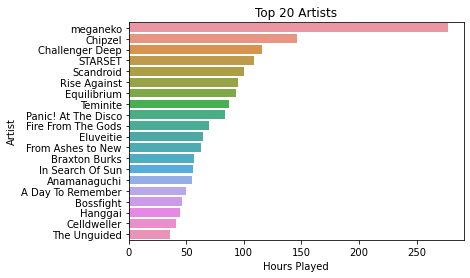

In [6]:
top_n_artists = 20
plotted_artist_df = artist_df.sort_values(by='hrsPlayed', ascending=False)[:top_n_artists]
ax = sns.barplot(data=plotted_artist_df, x='hrsPlayed', y='artist', orient='h')
ax.set(title=f'Top {top_n_artists} Artists')
ax.set(ylabel='Artist')
ax.set(xlabel='Hours Played')

In [7]:
sp = get_spotify_client()

In [8]:
n_artists: int = 100
limited_artists = artist_df.sort_values(by='hrsPlayed', ascending=False)[:n_artists]
artists = [sp.search(q=artist, limit=1, type='artist')['artists']['items'][0] for artist in limited_artists['artist']]

In [9]:
artists_big_df_raw = pd.DataFrame.from_records(artists, index='id', exclude=['external_urls', 'followers', 'href', 'images', 'type'])
artists_big_df_raw['id'] = artists_big_df_raw.index
artists_big_df = artists_big_df_raw.explode('genres').drop_duplicates()
artists_big_df.head()

,genres,name,popularity,uri,id
id,,,,,
5tXUIbGjW1uqXoy8cPW8MB,chiptune,meganeko,46,spotify:artist:5tXUIbGjW1uqXoy8cPW8MB,5tXUIbGjW1uqXoy8cPW8MB
5tXUIbGjW1uqXoy8cPW8MB,speedrun,meganeko,46,spotify:artist:5tXUIbGjW1uqXoy8cPW8MB,5tXUIbGjW1uqXoy8cPW8MB
6mgvN6ZusGnE2uz5WWO3nC,chiptune,Chipzel,43,spotify:artist:6mgvN6ZusGnE2uz5WWO3nC,6mgvN6ZusGnE2uz5WWO3nC
6mgvN6ZusGnE2uz5WWO3nC,speedrun,Chipzel,43,spotify:artist:6mgvN6ZusGnE2uz5WWO3nC,6mgvN6ZusGnE2uz5WWO3nC
4UeFbnKOjmVX7tQoxEhw2G,instrumental math rock,Challenger Deep,30,spotify:artist:4UeFbnKOjmVX7tQoxEhw2G,4UeFbnKOjmVX7tQoxEhw2G


In [41]:
artists_big_df[artists_big_df['genres'].str.contains('rap', na=False)][['name','genres']].drop_duplicates()

,name,genres
id,,
4HrkLxQHZ5mgCtIVpiH5QX,From Ashes to New,rap rock
4BKyei61gtyDFxlKhcvBJJ,Celldweller,rap rock
2Zxy5LwBatI5kw4uponwHQ,Riot Ten,electronic trap
6XyY86QOPPrYVGvF9ch6wz,Linkin Park,rap metal
0lLY20XpZ9yDobkbHI7u1y,Pegboard Nerds,bass trap
1tG7s7S4sq2eFFW0QZyLbm,Sheff G,nyc rap
0wnsM0ziqToBwQeEbH0akL,Social Club Misfits,christian trap
0wnsM0ziqToBwQeEbH0akL,Social Club Misfits,rap cristiano


In [45]:
artists_big_df[['name','genres']].drop_duplicates('name').to_csv('./yeet.csv')

In [46]:
artists_big_df['genres'].unique()

array(['chiptune', 'speedrun', 'instrumental math rock',
       'alternative metal', 'future rock', 'cyberpunk', 'darksynth',
       'synthwave', 'chicago hardcore', 'chicago punk', 'hardcore punk',
       'pop punk', 'punk', 'folk metal', 'german metal',
       'german pagan metal', 'melodic death metal', 'power metal',
       'viking metal', 'edm', 'electro house', 'gaming edm',
       'baroque pop', 'emo', 'modern rock', 'conscious hip hop',
       'metalcore', 'bow pop', 'celtic metal', 'celtic rock',
       'hurdy-gurdy', 'swiss metal', 'gymcore', 'post-screamo',
       'rap rock', 'otacore', 'pokemon', 'scorecore', 'uk metalcore',
       'bitpop', 'indie game soundtrack', 'japanese vgm', 'nintendocore',
       'screamo', 'mongolian folk', 'throat singing', 'industrial metal',
       'industrial rock', 'nu metal', 'melodic groove metal',
       'swedish alternative rock', 'swedish metalcore', 'metal',
       'chillstep', 'electronic djent', 'finnish metal',
       'melodic metalco

In [10]:
genres_df = artists_big_df.groupby('genres').count().sort_values(by='id', ascending=False)
genres_df['genre'] = genres_df.index
genres_df.head()

,name,popularity,uri,id,genre
genres,,,,,
alternative metal,11,11,11,11,alternative metal
otacore,9,9,9,9,otacore
chiptune,8,8,8,8,chiptune
hollywood,7,7,7,7,hollywood
pop punk,7,7,7,7,pop punk


In [11]:
plotted_genres = genres_df[genres_df['id'] >= 5]
plotted_genres.shape

(16, 5)

[Text(0, 0.5, 'Genre')]

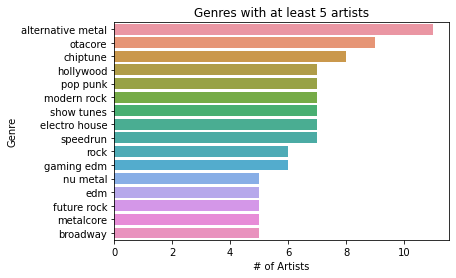

In [12]:
ax = sns.barplot(data=plotted_genres, x='id', y='genre', orient='h')
ax.set(title='Genres with at least 5 artists')
ax.set(xlabel='# of Artists')
ax.set(ylabel='Genre')

<AxesSubplot:xlabel='id', ylabel='genre'>

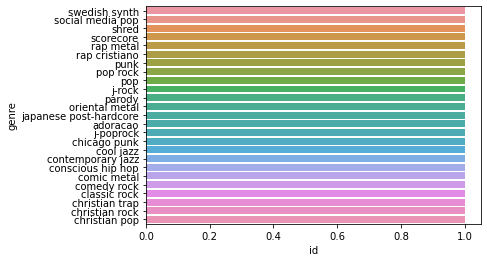

In [51]:
sns.barplot(data=genres_df[genres_df['id'] == 1][20:45], x='id', y='genre', orient='h')

In [13]:
artists_big_df_raw.head()

,genres,name,popularity,uri,id
id,,,,,
5tXUIbGjW1uqXoy8cPW8MB,"[chiptune, speedrun]",meganeko,46,spotify:artist:5tXUIbGjW1uqXoy8cPW8MB,5tXUIbGjW1uqXoy8cPW8MB
6mgvN6ZusGnE2uz5WWO3nC,"[chiptune, speedrun]",Chipzel,43,spotify:artist:6mgvN6ZusGnE2uz5WWO3nC,6mgvN6ZusGnE2uz5WWO3nC
4UeFbnKOjmVX7tQoxEhw2G,[instrumental math rock],Challenger Deep,30,spotify:artist:4UeFbnKOjmVX7tQoxEhw2G,4UeFbnKOjmVX7tQoxEhw2G
0kD8IT1CzF7js2XKM9lLLa,"[alternative metal, future rock]",STARSET,69,spotify:artist:0kD8IT1CzF7js2XKM9lLLa,0kD8IT1CzF7js2XKM9lLLa
27qG899eLldfpYtPr3S3NJ,"[cyberpunk, darksynth, synthwave]",Scandroid,55,spotify:artist:27qG899eLldfpYtPr3S3NJ,27qG899eLldfpYtPr3S3NJ


In [14]:
artist_df.head()

,msPlayed,artist,hrsPlayed
artistName,,,
"""Weird Al"" Yankovic",57255270,"""Weird Al"" Yankovic",15.904242
10 Years,18156,10 Years,0.005043
100 gecs,0,100 gecs,0.000000
1000say,37,1000say,0.000010
11 Acorn Lane,11819316,11 Acorn Lane,3.283143


In [15]:
artist_df.shape, artists_big_df_raw.shape

((1778, 3), (100, 5))

In [16]:
values = {}
for artist_row in artists_big_df_raw.values:
    other_row = artist_df[artist_df['artist'] == artist_row[1]]
    values[artist_row[1]] = (artist_row, other_row)
pd.DataFrame.from_records(values).head()

,"""Weird Al"" Yankovic",A Day To Remember,Amaranthe,Anamanaguchi,André De Shields,Bad Wolves,Bart & Baker,Bill Wurtz,Black Veil Brides,Bloodywood,...,Thirty Seconds To Mars,Trash80,Turbo,UVERworld,While She Sleeps,Zardonic,coldrain,dEMOTIONAL,insaneintherainmusic,meganeko
0,"[[comedy rock, comic, parody], ""Weird Al"" Yank...","[[metalcore, pop punk, screamo], A Day To Reme...","[[gothic symphonic metal, power metal], Amaran...","[[bitpop, chiptune, indie game soundtrack, jap...","[[broadway, hollywood, show tunes], André De S...","[[alternative metal, metal], Bad Wolves, 68, s...","[[electro swing, nu jazz], Bart & Baker, 43, s...","[[comic], Bill Wurtz, 52, spotify:artist:78cT0...","[[alternative metal, modern rock, pop punk, sc...","[[comic metal, indian metal], Bloodywood, 40, ...",...,"[[modern rock, pop punk, post-grunge, rock], T...","[[chiptune], Trash80, 32, spotify:artist:0g5MF...","[[], Turbo, 46, spotify:artist:0TYydMAKPBYjZB0...","[[anime, j-pop, j-poprock, otacore], UVERworld...","[[melodic metalcore, metalcore, uk metalcore],...","[[darkstep, future rock], Zardonic, 54, spotif...","[[j-rock, japanese post-hardcore, metalcore], ...","[[gymcore, post-screamo, swedish alternative r...","[[otacore], insaneintherainmusic, 55, spotify:...","[[chiptune, speedrun], meganeko, 46, spotify:a..."
1,msPlayed ar...,msPlayed artis...,msPlayed artist hrsPlayed art...,msPlayed artist hrsPlay...,msPlayed artist ...,msPlayed artist hrsPlayed a...,msPlayed artist hrsPlaye...,msPlayed artist hrsPlayed ar...,msPlayed artist...,msPlayed artist hrsPlayed a...,...,msPlayed ...,msPlayed artist hrsPlayed artis...,msPlayed artist hrsPlayed artistN...,msPlayed artist hrsPlayed art...,msPlayed artist ...,msPlayed artist hrsPlayed arti...,msPlayed artist hrsPlayed arti...,msPlayed artist hrsPlayed ar...,msPlayed ...,msPlayed artist hrsPlayed ar...


In [17]:
artists_joined_df = artists_big_df_raw.join(artist_df, on=['name', 'artist'])
# artists_big_df['hrsPlayed'] = [artist_df[artist_df['artist'] == artist]['hrsPlayed'] for artist in artists_big_df['name']]
artists_joined_df.head()

ValueError: len(left_on) must equal the number of levels in the index of "right"